  Product_ID Product_Category Customer_Location  Price  Discount_Applied  \
0       P001      Electronics          New York    500              0.10   
1       P002          Fashion        California     80              0.20   
2       P003             Home             Texas    150              0.15   
3       P004      Electronics           Florida   1200              0.05   
4       P005          Fashion          New York     60              0.30   

   Purchase_Frequency  Review_Rating  Sales  
0                   5            4.2   2250  
1                   3            3.8    192  
2                   2            4.5    255  
3                   1            4.7   1140  
4                   4            4.0    168  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_ID          10 non-null     object 
 1   Product_Catego

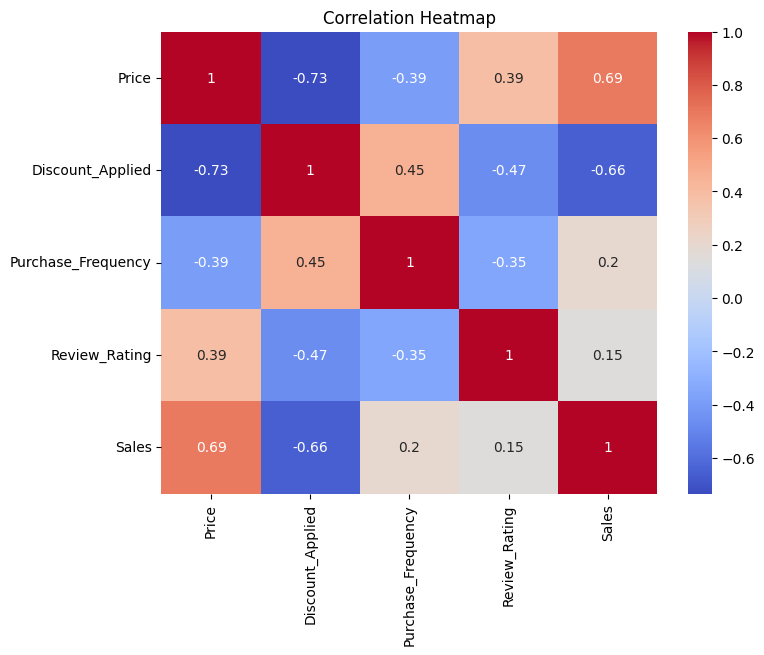

After Encoding:
    Product_ID  Product_Category  Customer_Location   Price  Discount_Applied  \
0           0                 0                  3   500.0              0.10   
1           1                 1                  0    80.0              0.20   
2           2                 2                  4   150.0              0.15   
3           3                 0                  1  1200.0              0.05   
4           4                 1                  3    60.0              0.30   

   Purchase_Frequency  Review_Rating   Sales  
0                 5.0            4.2  2250.0  
1                 3.0            3.8   192.0  
2                 2.0            4.5   255.0  
3                 1.0            4.7  1140.0  
4                 4.0            4.0   168.0  
After Scaling:
    Product_ID  Product_Category  Customer_Location     Price  \
0           0                 0                  3  0.385965   
1           1                 1                  0  0.017544   
2           

KeyError: "['sales'] not found in axis"

In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Python\Day68,69\ecommerce_sales.csv")

print(df.head())
print(df.info())


print("Missing values:\n", df.isna().sum())
print("\nSummary stats:\n", df.describe())

# Correlation heatmap (numerical features)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


from sklearn.impute import SimpleImputer

# Handle missing values
num_cols = df.select_dtypes(include=["number"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Numerical columns - use mean
for col in num_cols:
    df[col] = SimpleImputer(strategy="mean").fit_transform(df[[col]])

# Categorical columns - use most frequent
for col in cat_cols:
    df[col] = SimpleImputer(strategy="most_frequent").fit_transform(df[[col]]).ravel()

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("After Encoding:\n", df.head())


scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("After Scaling:\n", df.head())


X = df.drop(columns=["sales"])   
y = df["sales"]                  

selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Top Features by SelectKBest:", list(selected_features))


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained variance ratio:", pca.explained_variance_ratio_)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Performance:")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
